In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def show_masks(ids, img_dir, mask_dir):
    idxs = np.random.randint(0, len(ids), size=4)

    plt.figure(figsize=(10, 20))

    for i, idx in enumerate(idxs):
        example_id = ids[idx]
        img_path = os.path.join(img_dir, example_id+'.png')
        mask_path = os.path.join(mask_dir, example_id+'.png')
        img = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('RGB')
        plt.subplot(4, 2, i*2+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(4, 2, i*2+2)
        plt.imshow(mask)
        plt.xticks([])
        plt.yticks([])

    plt.show()

In [3]:
def get_image_stats(ids, mask_dir):
    """function returns dataframe with each row containing stats for an image like height,
       width, foreground pixels, background pixels"""
    img_attrib=[]
    for mask_id in ids:
        mask_path = os.path.join(mask_dir, mask_id+'.png')
        mask = np.array(Image.open(mask_path))
        height, width = mask.shape
        area = height*width
        road_pixels = len(np.where(mask==255)[0])
        bg_pixels = area-road_pixels
        road_pixels_per = (road_pixels / area)*100
        bg_pixels_per = (bg_pixels/area)*100
        img_attrib.append({'height':height, 'width':width, 'area':area, 
                           'road_pixels':road_pixels, 'bg_pixels':bg_pixels, 
                           'road_pixels_per':road_pixels_per, 'bg_pixels_per':bg_pixels_per})

    img_stats_df = pd.DataFrame(img_attrib)
    
    return img_stats_df

In [4]:
train_dir = '../data/road_segmentation_ideal/training/'
train_img_dir = os.path.join(train_dir, 'input')
train_mask_dir = os.path.join(train_dir, 'output')

In [5]:
train_img_ids = sorted([img_name.split('.')[0] for img_name in os.listdir(train_img_dir) if img_name.endswith('.png')])
train_mask_ids = sorted([img_name.split('.')[0] for img_name in os.listdir(train_mask_dir) if img_name.endswith('.png')])

In [6]:
print(f'Number of images: {len(train_img_ids)} Number of masks: {len(train_mask_ids)}')

Number of images: 1105 Number of masks: 804


In [7]:
#get images having corresponding masks
train_ids = sorted(list((set(train_img_ids).intersection(train_mask_ids))))
print(f'Number of images having corresponding masks: {len(train_ids)}')

Number of images having corresponding masks: 804


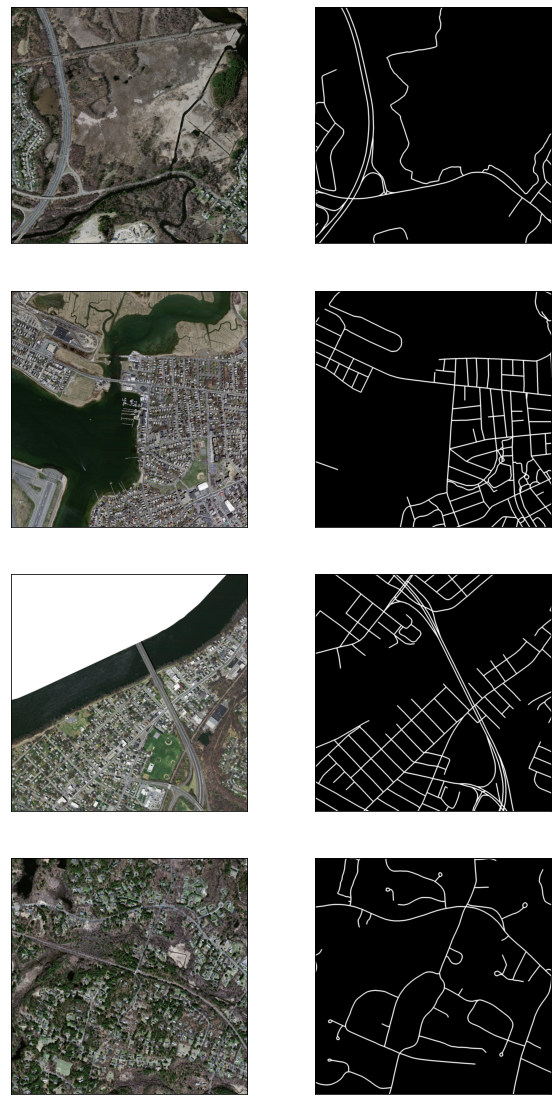

In [8]:
show_masks(train_ids, train_img_dir, train_mask_dir)

In [9]:
train_img_stats = get_image_stats(train_ids, train_mask_dir)
train_img_stats.describe()

,height,width,area,road_pixels,bg_pixels,road_pixels_per,bg_pixels_per
count,804.0,804.0,804.0,804.000000,8.040000e+02,804.000000,804.000000
mean,1500.0,1500.0,2250000.0,117340.655473,2.132659e+06,5.215140,94.784860
std,0.0,0.0,0.0,75938.547720,7.593855e+04,3.375047,3.375047
min,1500.0,1500.0,2250000.0,2913.000000,1.807388e+06,0.129467,80.328356
25%,1500.0,1500.0,2250000.0,55667.750000,2.082287e+06,2.474122,92.546100
50%,1500.0,1500.0,2250000.0,101626.500000,2.148374e+06,4.516733,95.483267
75%,1500.0,1500.0,2250000.0,167712.750000,2.194332e+06,7.453900,97.525878
max,1500.0,1500.0,2250000.0,442612.000000,2.247087e+06,19.671644,99.870533


All the images are of size 1500x1500. Also, on an average foreground pixels occupy 5% and background pixles occupy 95% of image

In [10]:
test_dir = '../data/road_segmentation_ideal/testing/'
test_img_dir = os.path.join(test_dir, 'input')
test_mask_dir = os.path.join(test_dir, 'output')

test_ids = sorted([img_name.split('.')[0] for img_name in os.listdir(test_img_dir) if img_name.endswith('.png')])
print(f'Test images: {len(test_ids)}')

Test images: 13


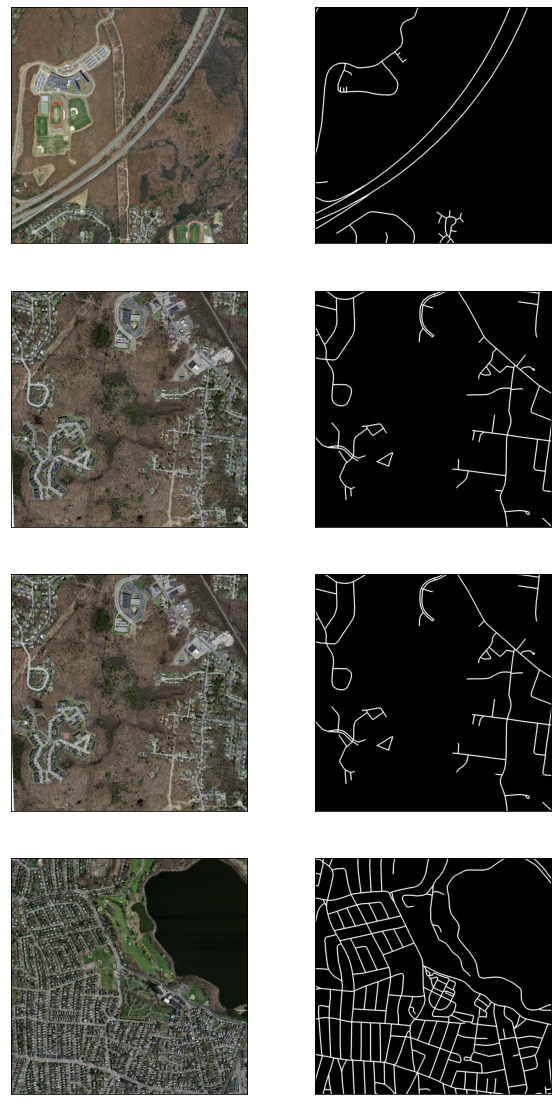

In [11]:
show_masks(test_ids, test_img_dir,test_mask_dir)

In [12]:
test_img_stats = get_image_stats(test_ids, test_mask_dir)
test_img_stats.describe()

,height,width,area,road_pixels,bg_pixels,road_pixels_per,bg_pixels_per
count,13.0,13.0,13.0,13.000000,1.300000e+01,13.000000,13.000000
mean,1500.0,1500.0,2250000.0,159650.692308,2.090349e+06,7.095586,92.904414
std,0.0,0.0,0.0,80025.818799,8.002582e+04,3.556703,3.556703
min,1500.0,1500.0,2250000.0,54739.000000,1.959307e+06,2.432844,87.080311
25%,1500.0,1500.0,2250000.0,90982.000000,2.036116e+06,4.043644,90.494044
50%,1500.0,1500.0,2250000.0,158584.000000,2.091416e+06,7.048178,92.951822
75%,1500.0,1500.0,2250000.0,213884.000000,2.159018e+06,9.505956,95.956356
max,1500.0,1500.0,2250000.0,290693.000000,2.195261e+06,12.919689,97.567156
